In [4]:
## 题目一
import pandas as pd

data = pd.read_excel('sz50.xlsx', sheetname=None, index_col='datetime')
print(data.keys())
type(data)

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


collections.OrderedDict

In [2]:
## 题目二
#pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')
import numpy as np
import talib as ta

p_seri=data['600036.XSHG'].close
#np.array(data['600036.XSHG'].close.values)
#type(data['600036.XSHG'].close.values)
#ta.MA(data['600036.XSHG'].close.values,10)[-5:]
p=p_seri.values
print(type(p))
ma10=ta.MA(p,10)
print(ma10[-5:])

<class 'numpy.ndarray'>
[ 108.35   108.741  109.176  110.102  111.666]


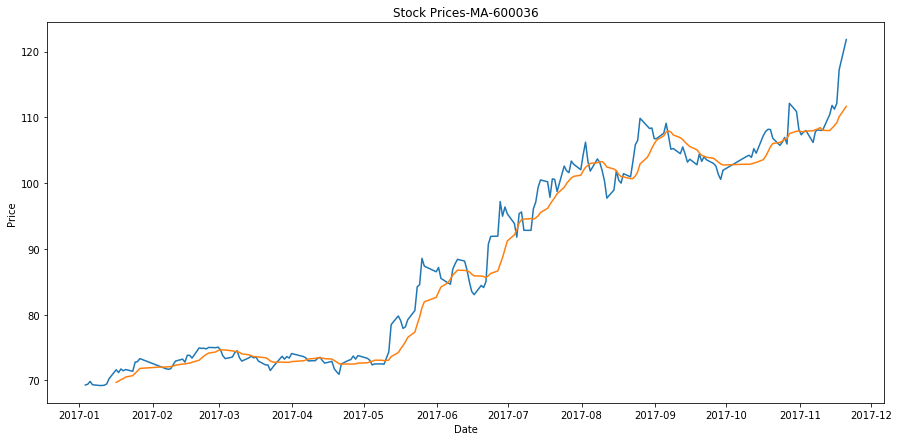

In [3]:
## 题目三
import matplotlib.pyplot as plt

p_ma=pd.Series(ma10)
p_ma.index=p_seri.index
p_ma=p_ma.dropna()

price=p_seri.dropna()

plt.figure(figsize=(15, 7))
plt.plot(price)
plt.plot(p_ma)
plt.title("Stock Prices-MA-600036")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

In [4]:
#print(type(data['600036.XSHG'].close))
print(type(data['600036.XSHG']))
#print(type(data))
#data['600036.XSHG']

<class 'pandas.core.frame.DataFrame'>


In [9]:
##题目四
import talib.abstract as taa

rocr_100 = {}
for k in data.keys():
    if data[k].empty != True:
        #print(data[k].tail(1))
        rocr_100[k]=taa.ROCR100(data[k],5).dropna()
        #print(type(rocr_100[k]))
        #print(rocr_100[k].dropna())
        
rocr_100_df = pd.DataFrame(rocr_100)   
#rocr_100_df

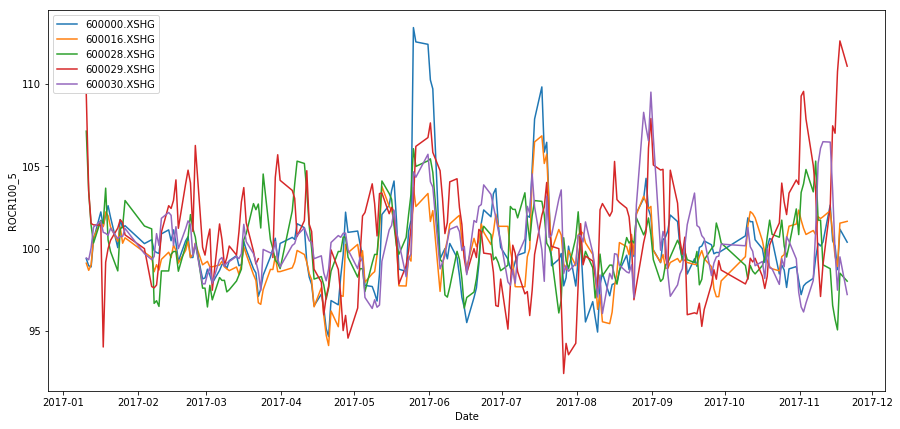

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(rocr_100_df.iloc[:,:5])
plt.ylabel("ROCR100_5")
plt.xlabel("Date")
plt.legend(data.keys())
plt.show()  

In [7]:
##题目五
from datetime import datetime

Pn = pd.Panel(data)

In [10]:
pn_macd =pd.Panel({name: taa.MACD(value) for (name, value) in Pn.iteritems() if value.empty != True})
#这里很奇怪啊，上面循环的时候可以用，放字典生成式里面就不行，下面用name来判断也可以，非常奇怪

Exception: inputs are all NaN

In [8]:
pn_macd = pd.Panel({name: taa.MACD(value) for name, value in Pn.iteritems() if (name != '600485.XSHG')})
print(pn_macd)

<class 'pandas.core.panel.Panel'>
Dimensions: 49 (items) x 215 (major_axis) x 3 (minor_axis)
Items axis: 600000.XSHG to 601989.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: macd to macdhist


In [9]:
df_macd = pn_macd.transpose(2,1,0).to_frame()
print(df_macd)
#print(df_macd[df_macd.isnull().values == True])

                                       macd  macdsignal   macdhist
datetime            minor                                         
2017-02-24 15:00:00 600000.XSHG    0.871114    1.197907  -0.326792
                    600016.XSHG   -0.007077    0.265328  -0.272405
                    600028.XSHG    0.028081    0.052015  -0.023934
                    600029.XSHG    0.221787    0.132200   0.089587
                    600030.XSHG    0.602873    0.620235  -0.017362
                    600036.XSHG    1.291055    1.245643   0.045412
                    600048.XSHG    2.316978    1.771997   0.544982
                    600050.XSHG   -0.105248   -0.189278   0.084029
                    600100.XSHG    0.453028    0.079491   0.373537
                    600104.XSHG    2.271146    2.012658   0.258488
                    600111.XSHG    2.429090    1.926561   0.502529
                    600340.XSHG    8.025312    5.194384   2.830927
                    600518.XSHG    1.014290    2.387216  -1.37

Exception: inputs are all NaN